In [1]:
import torch

In [17]:
import torch
from utils import *
from PIL import Image, ImageDraw, ImageFont

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model checkpoints
#srgan_checkpoint = "./checkpoint_srgan.pth.tar"
# srresnet_checkpoint = "./checkpoint_1.tar"

# # Load models
# srresnet = torch.load(srresnet_checkpoint).to(device)
# srresnet.eval()
#srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
#srgan_generator.eval()


def visualize_sr(img, srresnet_eval, halve=False):
    """
    Visualizes the super-resolved images from the SRResNet and SRGAN for comparison with the bicubic-upsampled image
    and the original high-resolution (HR) image, as done in the paper.

    :param img: filepath of the HR iamge
    :param halve: halve each dimension of the HR image to make sure it's not greater than the dimensions of your screen?
                  For instance, for a 2160p HR image, the LR image will be of 540p (1080p/4) resolution. On a 1080p screen,
                  you will therefore be looking at a comparison between a 540p LR image and a 1080p SR/HR image because
                  your 1080p screen can only display the 2160p SR/HR image at a downsampled 1080p. This is only an
                  APPARENT rescaling of 2x.
                  If you want to reduce HR resolution by a different extent, modify accordingly.
    """
    # Load image, downsample to obtain low-res version
    hr_img = Image.open(img, mode="r")
    hr_img = hr_img.convert('RGB')
    if halve:
        hr_img = hr_img.resize((int(hr_img.width / 2), int(hr_img.height / 2)),
                               Image.LANCZOS)
    lr_img = hr_img.resize((int(hr_img.width / 4), int(hr_img.height / 4)),
                           Image.BICUBIC)

    # Bicubic Upsampling
    bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)

    # Super-resolution (SR) with SRResNet
    sr_img_srresnet = srresnet(convert_image(hr_img, source='pil', target='imagenet-norm').unsqueeze(0).to(device))
    sr_img_srresnet = sr_img_srresnet.squeeze(0).cpu().detach()
    sr_img_srresnet = convert_image(sr_img_srresnet, source='[-1, 1]', target='pil')

    # Super-resolution (SR) with SRGAN
    # sr_img_srgan = srgan_generator(convert_image(lr_img, source='pil', target='imagenet-norm').unsqueeze(0).to(device))
    # sr_img_srgan = sr_img_srgan.squeeze(0).cpu().detach()
    # sr_img_srgan = convert_image(sr_img_srgan, source='[-1, 1]', target='pil')

    # Create grid
    margin = 40
    grid_img = Image.new('RGB', (2 * hr_img.width + 3 * margin, 2 * hr_img.height + 3 * margin), (255, 255, 255))

    # Font
    draw = ImageDraw.Draw(grid_img)
    try:
        font = ImageFont.truetype("calibril.ttf", size=23)
        # It will also look for this file in your OS's default fonts directory, where you may have the Calibri Light font installed if you have MS Office
        # Otherwise, use any TTF font of your choice
    except OSError:
        print(
            "Defaulting to a terrible font. To use a font of your choice, include the link to its TTF file in the function.")
        font = ImageFont.load_default()

    # Place bicubic-upsampled image
    grid_img.paste(bicubic_img, (margin, margin))
    #text_size = font.getsize("Bicubic")
    # draw.text(xy=[margin + bicubic_img.width / 2 - text_size[0] / 2, margin - text_size[1] - 5], text="Bicubic",
    #           font=font,
    #           fill='black')

    # Place SRResNet image
    grid_img.paste(sr_img_srresnet, (2 * margin + bicubic_img.width, margin))
    # text_size = font.getsize("SRResNet")
    # draw.text(
    #     xy=[2 * margin + bicubic_img.width + sr_img_srresnet.width / 2 - text_size[0] / 2, margin - text_size[1] - 5],
    #     text="SRResNet", font=font, fill='black')

    # Place SRGAN image
    # grid_img.paste(sr_img_srgan, (margin, 2 * margin + sr_img_srresnet.height))
    # text_size = font.getsize("SRGAN")
    # draw.text(
    #     xy=[margin + bicubic_img.width / 2 - text_size[0] / 2, 2 * margin + sr_img_srresnet.height - text_size[1] - 5],
    #     text="SRGAN", font=font, fill='black')

    # Place original HR image
    grid_img.paste(hr_img, (2 * margin + bicubic_img.width, 2 * margin + sr_img_srresnet.height))
    # text_size = font.getsize("Original HR")
    # draw.text(xy=[2 * margin + bicubic_img.width + sr_img_srresnet.width / 2 - text_size[0] / 2,
    #               2 * margin + sr_img_srresnet.height - text_size[1] - 1], text="Original HR", font=font, fill='black')

    # Display grid
    grid_img.show()

    return grid_img

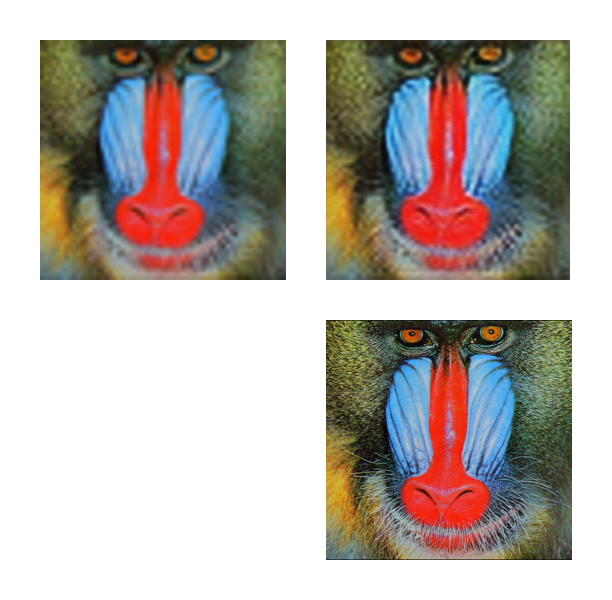

In [18]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_0_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("test_dataset/baboon.png", srresnet)

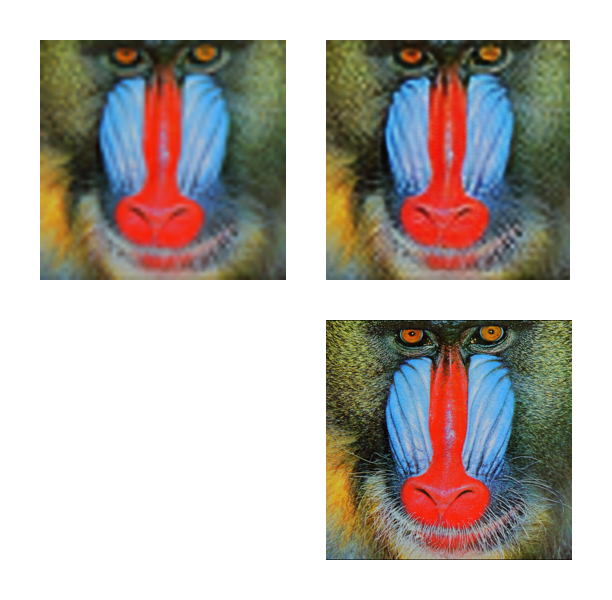

In [20]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_1_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("test_dataset/baboon.png", srresnet)

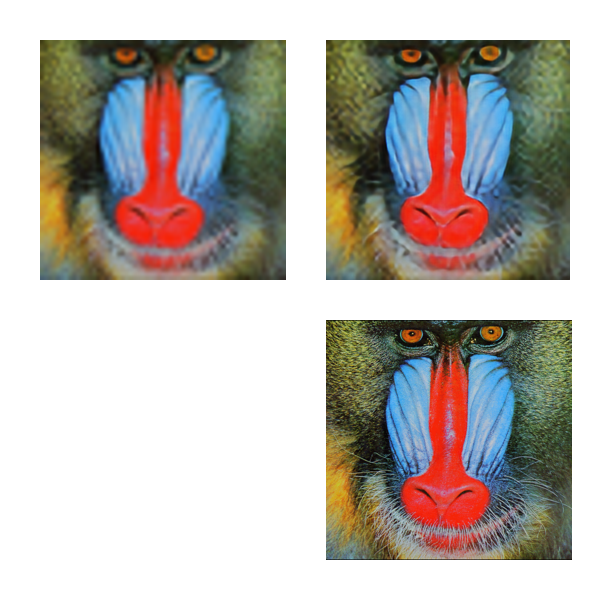

In [24]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_16_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("test_dataset/baboon.png", srresnet)

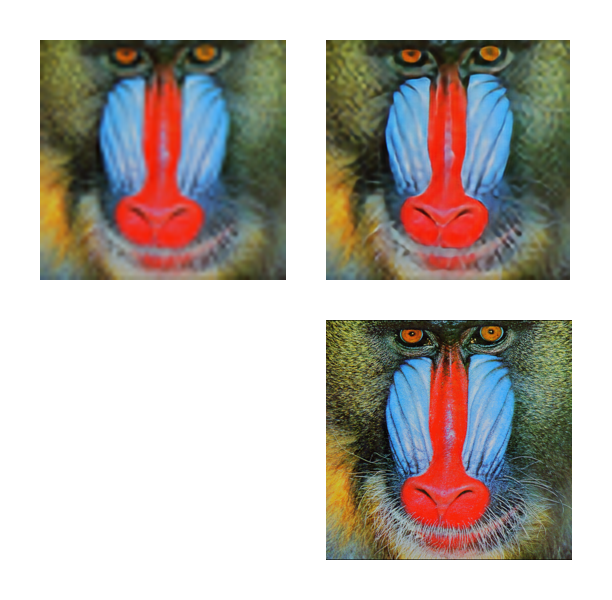

In [27]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_18_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("test_dataset/baboon.png", srresnet)

c:\Users\gusta\anaconda3\envs\super\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


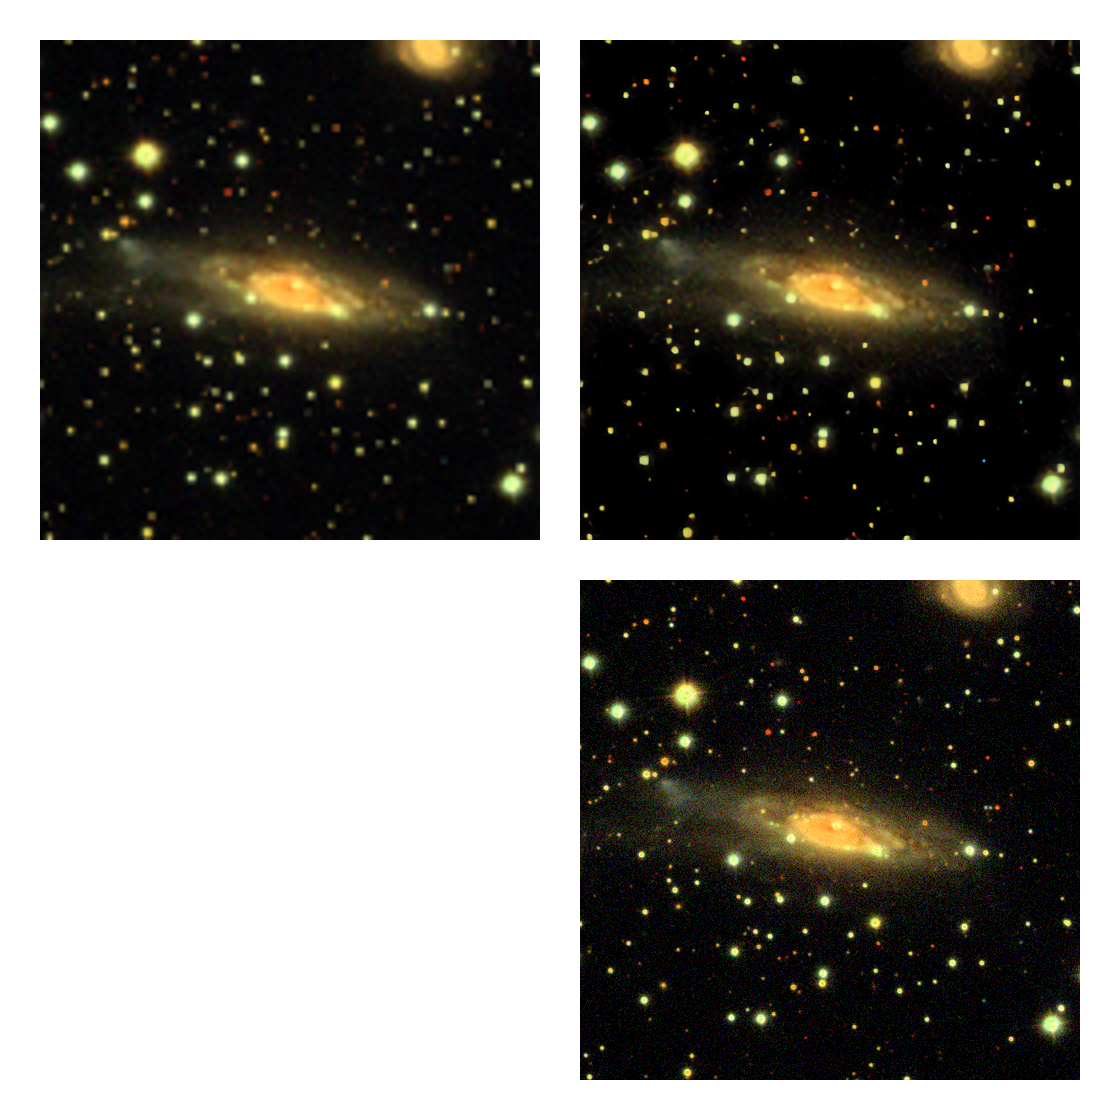

In [30]:
srresnet_checkpoint = "./checkpoints/checkpoint_srresnet_21_.pth.tar"

# Load models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

visualize_sr("./test_dataset/__500.png", srresnet)